In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("advertising_ef.csv")

In [48]:
data.shape

(1009, 10)

In [49]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [50]:
data.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [52]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1005.000000,998.000000,998.000000,1005.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.879997,8.772142,13381.286752,43.923438,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.300000,29.000000,46993.367500,138.870000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.570000,42.000000,65267.402500,218.800000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [53]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [54]:
data['Daily Time Spent on Site'] = data['Daily Time Spent on Site'].fillna(data['Daily Time Spent on Site'].median())

In [55]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [56]:
data['Area Income'] = data['Area Income'].fillna(data['Area Income'].median())
data['Daily Internet Usage'] = data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].median())

In [57]:
data['City'] = data['City'].fillna(data['City'].mode()[0])
data['Country'] = data['Country'].fillna(data['Country'].mode()[0])

In [58]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

<AxesSubplot:>

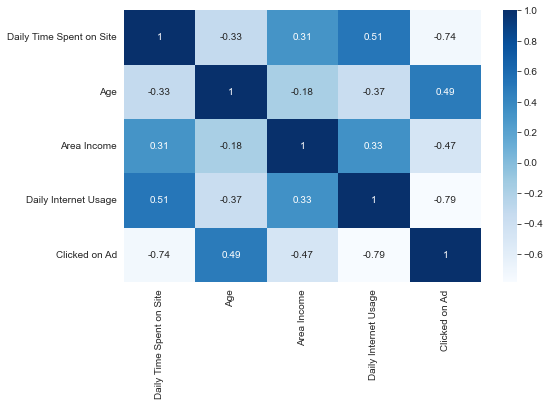

In [59]:
plt.figure(figsize= (8,5))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [60]:
data['Clicked on Ad'].value_counts(normalize = True)*100

1    50.148662
0    49.851338
Name: Clicked on Ad, dtype: float64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

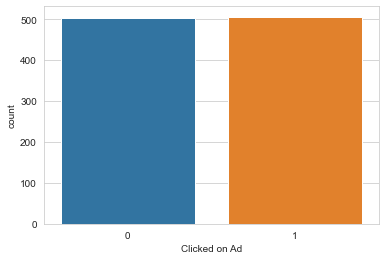

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

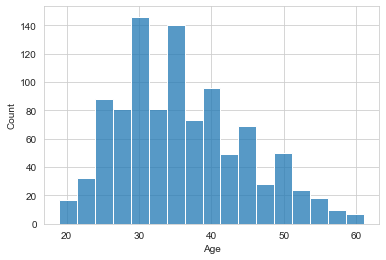

In [62]:
sns.histplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Daily Internet Usage'>

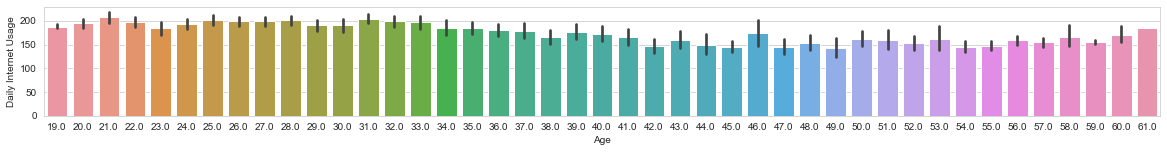

In [63]:
plt.figure(figsize= (20,2))
sns.barplot(x='Age', y='Daily Internet Usage', data=data)

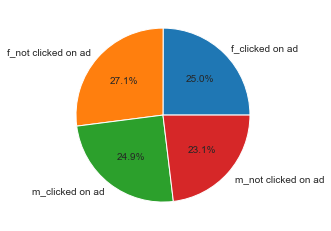

In [64]:
ads_by_gender = data.groupby(['Gender', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()
fig, ax = plt.subplots()
labels = ['f_clicked on ad', 'f_not clicked on ad', 'm_clicked on ad', 'm_not clicked on ad']
ax.pie(ads_by_gender.values.flatten(), labels = labels, autopct='%1.1f%%')
plt.show()

<Figure size 360x144 with 0 Axes>

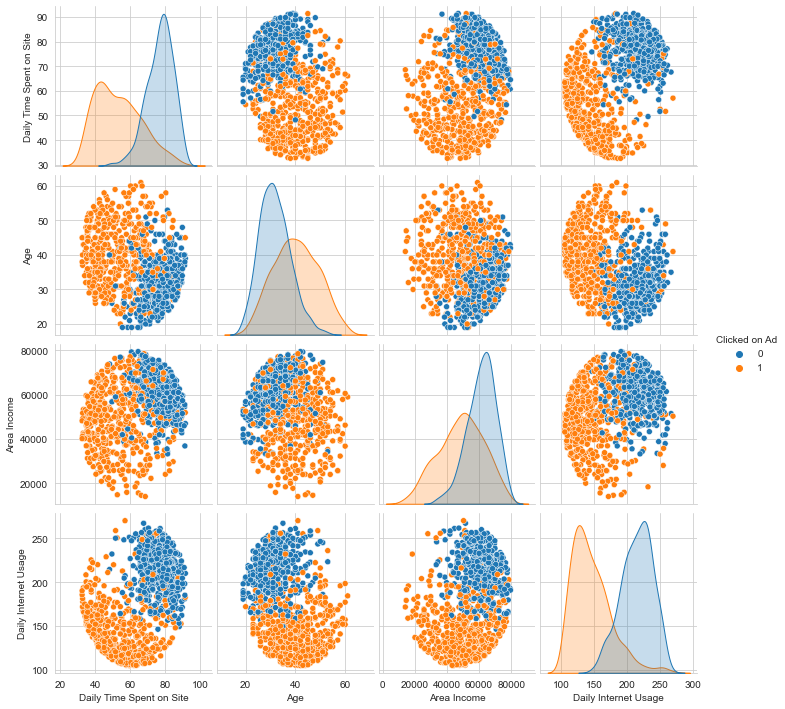

In [68]:
plt.figure(figsize= (5,2))
sns.pairplot(data, hue='Clicked on Ad')

<AxesSubplot:xlabel='Age'>

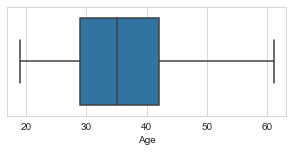

In [21]:
plt.figure(figsize= (5,2))
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Daily Time Spent on Site'>

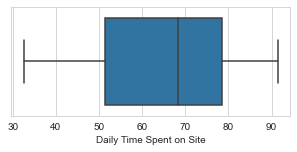

In [27]:
plt.figure(figsize= (5,2))
sns.boxplot(data['Daily Time Spent on Site'])

<AxesSubplot:xlabel='Area Income'>

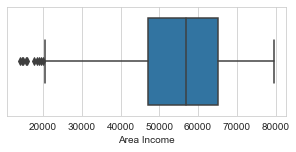

In [28]:
plt.figure(figsize= (5,2))
sns.boxplot(data['Area Income'])

<AxesSubplot:xlabel='Daily Internet Usage'>

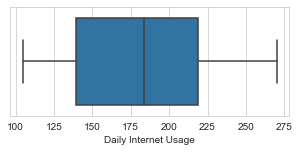

In [29]:
plt.figure(figsize= (5,2))
sns.boxplot(data['Daily Internet Usage'])

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Ad Topic Line'] = le.fit_transform(data['Ad Topic Line'])
data['City'] = le.fit_transform(data['City'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Country'] = le.fit_transform(data['Country'])
data['Timestamp'] = le.fit_transform(data['Timestamp'])


In [31]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,91,953,0,215,871,0
1,68.37,31.0,68441.85,193.77,464,895,1,147,120,0
2,69.47,26.0,59785.94,236.50,566,112,0,184,407,0
3,74.15,29.0,54806.18,245.89,903,931,1,103,301,0
4,68.37,35.0,73889.99,225.58,766,799,0,96,93,0


In [32]:
x=data.drop("Clicked on Ad",axis=1)
y=data["Clicked on Ad"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [35]:
x_train.shape,x_test.shape

((807, 9), (202, 9))

In [36]:
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp
158,80.46,27.0,61625.87,207.96,197,642,1,49,110
198,73.41,31.0,73049.30,201.26,657,264,1,84,503
331,41.47,31.0,60953.93,219.79,788,639,0,132,196
556,44.73,35.0,55316.97,127.56,518,582,1,84,863
204,70.04,31.0,74780.74,183.85,418,236,1,107,873


In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=2)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
dtc.fit(x_train,y_train)
pred1 = dtc.predict(x_train)
pred2 = dtc.predict(x_test)

In [40]:
accuracy_score(y_train,pred1)

0.942998760842627

In [41]:
confusion_matrix(y_train,pred1)

array([[368,  29],
       [ 17, 393]], dtype=int64)

In [42]:
accuracy_score(y_test,pred2)

0.9158415841584159

In [43]:
confusion_matrix(y_test,pred2)

array([[95, 11],
       [ 6, 90]], dtype=int64)

[Text(279.0, 271.8, 'X[3] <= 175.01\nentropy = 1.0\nsamples = 807\nvalue = [397, 410]'),
 Text(139.5, 163.08, 'X[0] <= 71.44\nentropy = 0.353\nsamples = 376\nvalue = [25, 351]'),
 Text(69.75, 54.360000000000014, 'entropy = 0.055\nsamples = 320\nvalue = [2, 318]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.977\nsamples = 56\nvalue = [23, 33]'),
 Text(418.5, 163.08, 'X[0] <= 58.115\nentropy = 0.576\nsamples = 431\nvalue = [372, 59]'),
 Text(348.75, 54.360000000000014, 'entropy = 0.426\nsamples = 46\nvalue = [4, 42]'),
 Text(488.25, 54.360000000000014, 'entropy = 0.261\nsamples = 385\nvalue = [368, 17]')]

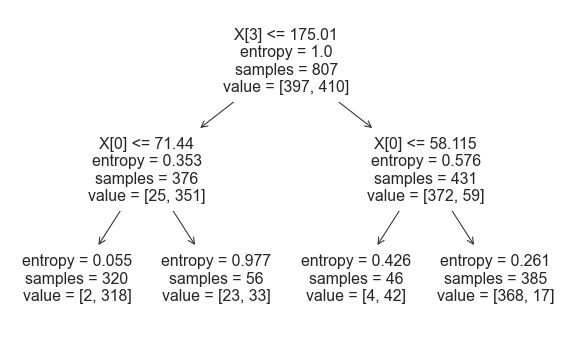

In [44]:
plt.figure(figsize = (10,6))
from sklearn import tree
tree.plot_tree(dtc.fit(x_train, y_train))